# Autoregressive Model
- Before I place model in [main.ipynb](https://github.com/Brinkley97/applied_time_series_and_machine_learning/blob/main/play/main.ipynb)

# Imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from matplotlib import pyplot

from statsmodels.tsa.ar_model import AutoReg

# test for stationarity
from statsmodels.tsa.stattools import adfuller

# partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

import statsmodels.graphics.tsaplots as tsa

In [2]:
ticker_symbol = "TCEHY"
start_date = "2010-01-05"
end_date = "2023-10-23"
voo_df = yf.download(ticker_symbol, start=start_date, end=end_date)
voo_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-05,4.474000,4.480000,4.410000,4.452000,4.053074,76000
2010-01-06,4.480000,4.482000,4.470000,4.482000,4.080386,56000
2010-01-07,4.298000,4.300000,4.254000,4.300000,3.914695,49500
2010-01-08,4.290000,4.360000,4.290000,4.358000,3.967497,26000
2010-01-11,4.440000,4.444000,4.426000,4.444000,4.045792,134000
...,...,...,...,...,...,...
2023-10-16,38.500000,39.279999,38.480000,39.160000,39.160000,2249200
2023-10-17,38.360001,38.799999,38.320000,38.700001,38.700001,1918500
2023-10-18,38.200001,38.299999,37.560001,37.900002,37.900002,3349200


<AxesSubplot: xlabel='Date'>

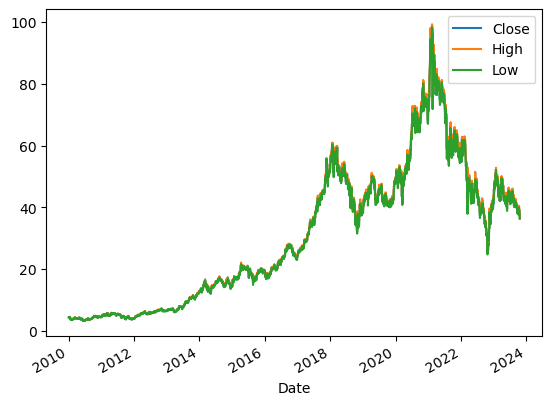

In [3]:
voo_df.loc[:, ['Close', 'High', 'Low']].plot()

<AxesSubplot: xlabel='Date'>

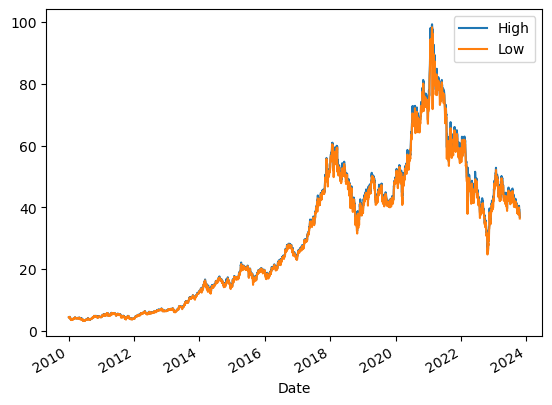

In [4]:
voo_df.loc[:, ['High', 'Low']].plot()

In [5]:
close_voo_df = voo_df['Close']
close_voo_df

Date
2010-01-05     4.452000
2010-01-06     4.482000
2010-01-07     4.300000
2010-01-08     4.358000
2010-01-11     4.444000
                ...    
2023-10-16    39.160000
2023-10-17    38.700001
2023-10-18    37.900002
2023-10-19    37.220001
2023-10-20    36.419998
Name: Close, Length: 3473, dtype: float64

<AxesSubplot: xlabel='Date'>

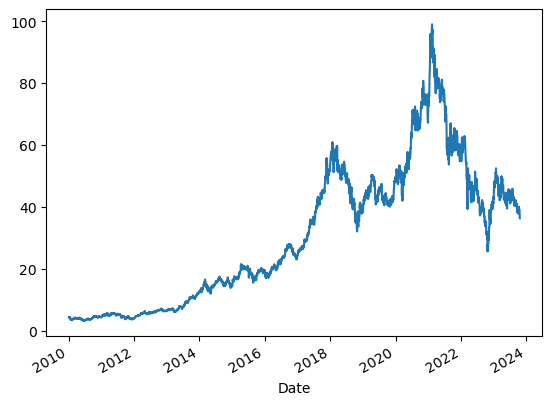

In [6]:
close_voo_df.plot()

# Check Stationarity
- [ ] Don't quite understand the `pvalue` from the Augmented Dickey-Fuller unit root test.

In [7]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(close_voo_df, autolag='AIC')
adf, pvalue, usedlag, nobs, critical_values, icbest

(-1.2930637128247073,
 0.6323396685845935,
 29,
 3443,
 {'1%': -3.432250720912043,
  '5%': -2.862379829543769,
  '10%': -2.5672170565954873},
 9423.444708782663)

# Plot Partial Autocorrelation
- ACor states at lag k, how much spread is there between the 1st observation and my kth observation.
- Here, there seems to be low ACor.
- [ ] What to do with this? 
- [ ] Does this mean our model prediction(s) will be off?

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


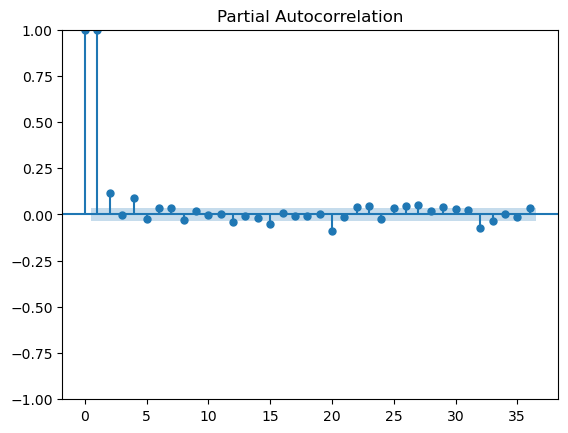

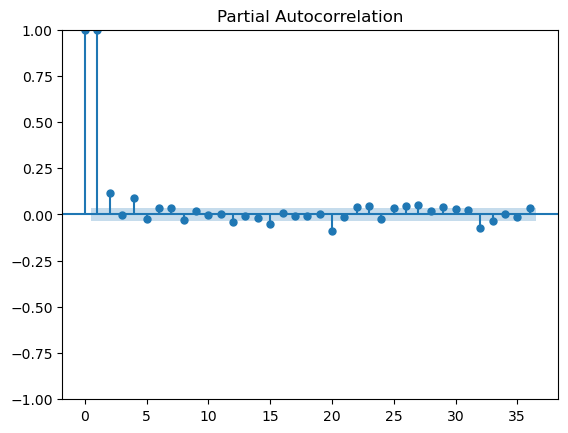

In [8]:
plot_pacf(close_voo_df)

# Split Data

In [9]:
N = len(close_voo_df)
N

3473

In [10]:
get_train_len = len(close_voo_df) - 7
get_train_len

3466

In [11]:
get_test_len = N - get_train_len
get_test_len

7

In [12]:
train_data = close_voo_df[:get_train_len]
train_data.values

array([ 4.45200014,  4.48199987,  4.30000019, ..., 39.31999969,
       40.04999924, 40.15999985])

In [13]:
test_data = close_voo_df[-get_test_len:]
test_data

Date
2023-10-12    39.470001
2023-10-13    39.000000
2023-10-16    39.160000
2023-10-17    38.700001
2023-10-18    37.900002
2023-10-19    37.220001
2023-10-20    36.419998
Name: Close, dtype: float64

In [14]:
test_data.values

array([39.47000122, 39.        , 39.15999985, 38.70000076, 37.90000153,
       37.22000122, 36.41999817])

# Create AR Model
- [ ] How to determine the proper lag value? 
    - Look at the Partial ACor plot. Being that no correlation exists after 2, we'll stop at 2 (where there still exists some correlation)
- [ ] How to understand the model summary?

In [15]:
ar_model = AutoReg(train_data.values, lags=2)
ar_model

In [16]:
train_ar_model = ar_model.fit()
train_ar_model

In [17]:
train_ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3466
Model:                     AutoReg(2)   Log Likelihood               -4753.262
Method:               Conditional MLE   S.D. of innovations              0.954
Date:                Wed, 08 Nov 2023   AIC                           9514.524
Time:                        23:38:15   BIC                           9539.124
Sample:                             2   HQIC                          9523.308
                                 3466                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0422      0.027      1.539      0.124      -0.012       0.096
y.L1           0.8901      0.017     52.699      0.000       0.857       0.923
y.L2           0.1089      0.017      6.451      0.000       0.076       0.142
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2           -9.1719           +0.0000j            9.1719            0.5000
-----------------------------------------------------------------------------
"""

# Make predictions
- Start making predictions at the split observation and go to the n-1 observation. A simplier example is with [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. Say we split at 7. historical_data would start at 7. We will make predictions for 8, 9. What about 10?

In [18]:
# historical_data = len(train_data)
# historical_data

In [19]:
# tomorrow = len(open_voo_df) - 1
# tomorrow

In [20]:
pred = train_ar_model.predict(start=get_train_len, end=len(train_data)+len(test_data)-1, dynamic=False)
pred

array([40.14976729, 40.15264198, 40.15408601, 40.15568442, 40.15726441,
       40.15884482, 40.16042358])

- [ ] Why is our plot as such?

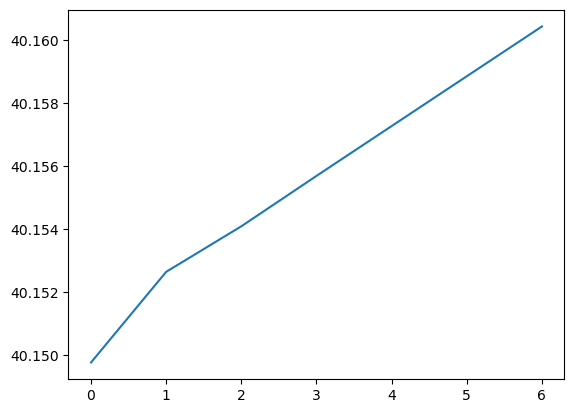

In [21]:
pyplot.plot(pred)

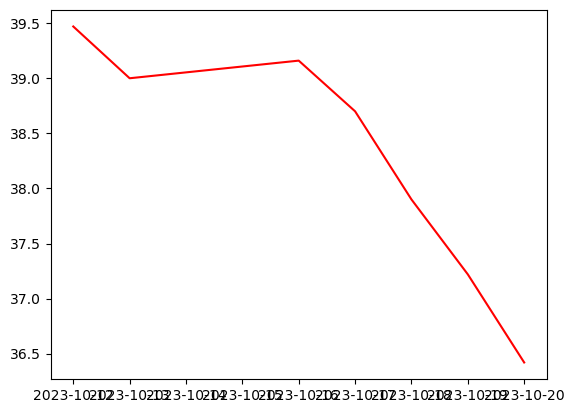

In [22]:
pyplot.plot(test_data, color='red')